In [ ]:

#Upload data from device
from google.colab import files
uploaded = files.upload()

Saving balanced_dataset.csv to balanced_dataset.csv


In [ ]:
#reading the data
import pandas as pd
df = pd.read_csv('balanced_dataset.csv')
df

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE
...,...,...
17835,great location pay stayed palace times visit s...,NEGATIVE
17836,"simply awful, hotel bad state repair, time sta...",NEGATIVE
17837,This was my second time staying here with my d...,POSITIVE
17838,n't worry old reviews just returned staying hi...,POSITIVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17840 entries, 0 to 17839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  17840 non-null  object
 1   label   17840 non-null  object
dtypes: object(2)
memory usage: 278.9+ KB


In [ ]:
df['label'].value_counts()

,count
label,
POSITIVE,8920
NEGATIVE,8920


In [ ]:
#check if there are unknown data meaning

def check_unknown_words(text):
    import re
    pattern = '[^\x00-\x7F]+'
    return re.findall(pattern, text)

df['unknown_words'] = df['review'].apply(check_unknown_words)
df['unknown_words']

,unknown_words
0,[]
1,[]
2,[]
3,[]
4,[Çî]
...,...
17835,[Ç]
17836,[]
17837,[…]
17838,[]


In [ ]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

translated_text = GoogleTranslator(source='auto', target='en').translate("नमस्ते")
print(translated_text)


Goodbye


In [ ]:
# Define translation function
def translate_text(text):
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
        return translated
    except Exception as e:
        print(f"Error in translation: {e}")
        return text

# Apply the function to your dataset
df['review'] = df['review'].apply(translate_text)

# Print sample translated reviews
print(df[['review']].head(936))

Streaming output truncated to the last 5000 lines.
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and 

In [ ]:
# text lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['label'] = df['label'].str.lower()


print(df.head())

                                              review     label unknown_words
0  not bad stay pretty pleasant, alarm going 3 no...  positive            []
1  westin times square cheats customer starwood p...  negative            []
2  good news/ bad news seattle just night opted l...  positive            []
3  expectations booked riu bambu online having st...  negative            []
4  hospital stayed 2 weeks got sick stomach upset...  negative          [Çî]


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
#check if data has emojis
import emoji

def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in str(text))

df['has_emoji'] = df['review'].apply(contains_emoji)

df_with_emojis = df[df['has_emoji'] == True]
print(df_with_emojis.head())

                                                review     label  \
77   worst 👎👎👎👎👎. never go there they are theif. th...  negative   
162  this is not a place ; this is an emotion. the ...  positive   
261  very nice use and student friendly means pocke...  negative   
275  the breakfast and dinner options were fabulous...  positive   
307  paris hiccaps, succumbing rave reviews similar...  positive   

                                         unknown_words  has_emoji  
77                                          [👎👎👎👎👎, …]       True  
162                                          [😍, ’, …]       True  
261  [খুবই, সুন্দর, ব্যবহার, এবং, মানে, পকেট, 😂।, আ...       True  
275                                             [😃, …]       True  
307                       [Çî, Ç, é, Ç, é, Ä, Ç, ©¢]       True  


In [ ]:
# Convert emojis into words
!pip install emot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Importing libraries
from emot.emo_unicode import UNICODE_EMOJI,EMOTICONS_EMO

# Function for converting emojis into words
def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text


df['review'] = df['review'].apply(converting_emojis)

print(df['review'].head(308))

0      not bad stay pretty pleasant, alarm going 3 no...
1      westin times square cheats customer starwood p...
2      good news/ bad news seattle just night opted l...
3      expectations booked riu bambu online having st...
4      hospital stayed 2 weeks got sick stomach upset...
                             ...                        
303    great place stay, clean large rooms friendly h...
304    the worst hotel in bolpur. receptionist, staff...
305    don't be fooled with the look of the images sh...
306    this hotel is designed, managed and staffed to...
307    paris hiccaps, succumbing rave reviews similar...
Name: review, Length: 308, dtype: object


In [ ]:
#Removing Punctuation
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s\']', '', str(x)))
df['review']

,review
0,not bad stay pretty pleasant alarm going 3 no ...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed 2 weeks got sick stomach upset...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
#Remove extra spaces
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# Remove unnecessary numbers
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review']

,review
0,not bad stay pretty pleasant alarm going no p...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed weeks got sick stomach upsets...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
!pip uninstall -y torch
!pip install torch==2.0.1
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.1 MB/s eta 0:00:

In [ ]:
# to extract negative words using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_negation_words_spacy(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.dep_ == "neg"]

In [ ]:
negation_words = ['no', 'not', 'nor', "don't","doesn't","never", "didn't", "can't", "won't", "couldn't", "shouldn't", "wouldn't", "n't"]

# combine all negative words
def get_all_negation_words(text):

    neg_spacy = extract_negation_words_spacy(text)

    tokens = text.lower().split()
    manual_found = [word for word in negation_words if word in tokens]

    return list(set(neg_spacy + manual_found))

df['negation_words'] = df['review'].apply(get_all_negation_words)


In [ ]:
#Removing Stop Words
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
all_negation_words = list(set(df['negation_words'].explode().dropna()))
custom_stop = [word for word in stop if word not in all_negation_words]


df['review'] = df['review'].apply(lambda x: " ".join(word for word in x.split() if word not in custom_stop))
df['review']

,review
0,not bad stay pretty pleasant alarm going no pr...
1,westin times square cheats customer starwood p...
2,good news bad news seattle night opted locatio...
3,expectations booked riu bambu online stayed ri...
4,hospital stayed weeks got sick stomach upsets ...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,second time staying daughter husbands first re...
17838,n't worry old reviews returned staying hilton ...


In [ ]:
#import necessary libraries for tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
#Tokenizing Text
from nltk.tokenize import word_tokenize

df['review_tokens'] = df['review'].apply(lambda x: word_tokenize(str(x)))
print(df[['review', 'review_tokens']].head())

                                              review  \
0  not bad stay pretty pleasant alarm going no pr...   
1  westin times square cheats customer starwood p...   
2  good news bad news seattle night opted locatio...   
3  expectations booked riu bambu online stayed ri...   
4  hospital stayed weeks got sick stomach upsets ...   

                                       review_tokens  
0  [not, bad, stay, pretty, pleasant, alarm, goin...  
1  [westin, times, square, cheats, customer, star...  
2  [good, news, bad, news, seattle, night, opted,...  
3  [expectations, booked, riu, bambu, online, sta...  
4  [hospital, stayed, weeks, got, sick, stomach, ...  


In [ ]:
#install necessary libariries
nltk.download('wordnet')
nltk.download('omw-1.4') #for post-of_speech method
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#POS for making lemmatization more effecient
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#Lemmatize the data using  WordNetLemmatizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens):
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word, tag in pos_tags:

        wordnet_pos = get_wordnet_pos(tag)

        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words


df['review_lemmatized'] = df['review_tokens'].apply(lemmatize_tokens)
print(df[['review_tokens', 'review_lemmatized']].head())

                                       review_tokens  \
0  [not, bad, stay, pretty, pleasant, alarm, goin...   
1  [westin, times, square, cheats, customer, star...   
2  [good, news, bad, news, seattle, night, opted,...   
3  [expectations, booked, riu, bambu, online, sta...   
4  [hospital, stayed, weeks, got, sick, stomach, ...   

                                   review_lemmatized  
0  [not, bad, stay, pretty, pleasant, alarm, go, ...  
1  [westin, time, square, cheat, customer, starwo...  
2  [good, news, bad, news, seattle, night, opt, l...  
3  [expectation, book, riu, bambu, online, stay, ...  
4  [hospital, stay, week, get, sick, stomach, ups...  


In [ ]:
#Compute the frequency of all words in the reviews
from nltk.probability import FreqDist

all_text = ' '.join(df['review_lemmatized'].apply(lambda x: ' '.join(x)))
freq_dist = FreqDist(all_text.split())
freq_dict = dict(freq_dist)
freq_dist

FreqDist({'room': 29007, 'hotel': 28196, 'not': 21091, 'stay': 14937, 'good': 11340, "n't": 11078, 'staff': 9355, 'read': 8962, 'great': 8694, 'no': 7851, ...})

In [ ]:
!pip install wordcloud

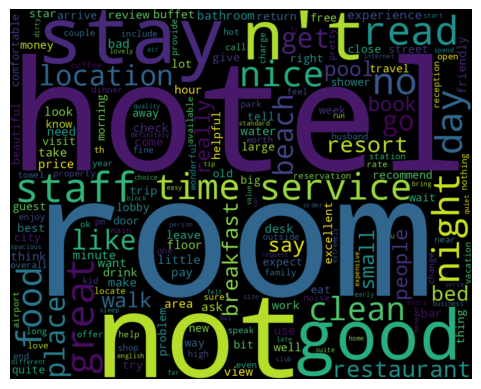

In [ ]:
# Build a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_review = WordCloud(width=1000, height=800, background_color='black').generate_from_frequencies(freq_dict)
plt.imshow(cloud_review, interpolation='bilinear')

plt.axis('off')
plt.show()

In [ ]:
?WordCloud

In [ ]:
processed_df=df
processed_df.to_csv('preprocessed_data.csv', index=False)
processed_df = pd.read_csv('preprocessed_data.csv')


In [ ]:
from google.colab import files
files.download("preprocessed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_data.csv to preprocessed_data.csv


In [7]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

In [8]:
# apply tf_idf feature extraction

In [9]:
def convert_to_string(text_list):
    if isinstance(text_list, list):
        return ' '.join(text_list)
    elif isinstance(text_list, str):
        # Check if it's a string representation of a list
        if text_list.startswith('[') and text_list.endswith(']'):
            try:
                # Try to evaluate it as a list
                evaluated_list = eval(text_list)
                if isinstance(evaluated_list, list):
                    return ' '.join(evaluated_list)
            except:
                pass
        return text_list
    else:
        return ""

# Apply the conversion to the 'review_lemmatized' column
df['review_lemmatized_str'] = df['review_lemmatized'].apply(convert_to_string)

In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer
# Step 1: Prepare the data for TF-IDF
# Convert the lists of lemmatized words back to strings if they're stored as lists
def convert_to_string(text_list):
    if isinstance(text_list, list):
        return ' '.join(text_list)
    elif isinstance(text_list, str):
        if text_list.startswith('[') and text_list.endswith(']'):
            try:
                evaluated_list = eval(text_list)
                if isinstance(evaluated_list, list):
                    return ' '.join(evaluated_list)
            except:
                pass
        return text_list
    else:
        return ""

# Apply the conversion to the 'review_lemmatized' column
df['review_lemmatized_str'] = df['review_lemmatized'].apply(convert_to_string)

# Step 2: Perform TF-IDF feature extraction
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Adjust as needed
    min_df=2,           # Minimum document frequency
    max_df=0.85,        # Maximum document frequency
    stop_words='english'  # Remove English stop words
)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review_lemmatized_str'])

# Get feature names (vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(feature_names)}")

# Function to analyze TF-IDF results
def show_top_features_per_document(tfidf_matrix, feature_names, doc_indices, top_n=10):
    """Show top TF-IDF features for selected documents"""
    for doc_idx in doc_indices:
        print(f"\nTop {top_n} features for document {doc_idx}:")
        row = tfidf_matrix[doc_idx].toarray().flatten()
        indices = row.argsort()[-top_n:][::-1]  # Get indices of top features
        for idx in indices:
            if row[idx] > 0:  # Only show non-zero features
                print(f"Feature: {feature_names[idx]}, TF-IDF Score: {row[idx]:.4f}")

# Show top features for some sample documents
sample_docs = [0, 1, 2]
show_top_features_per_document(tfidf_matrix, feature_names, sample_docs)

TF-IDF matrix shape: (17840, 5000)
Number of features: 5000

Top 10 features for document 0:
Feature: pleasant, TF-IDF Score: 0.4278
Feature: aquarium, TF-IDF Score: 0.3992
Feature: cooky, TF-IDF Score: 0.3523
Feature: alarm, TF-IDF Score: 0.3310
Feature: mall, TF-IDF Score: 0.2855
Feature: spot, TF-IDF Score: 0.2590
Feature: good, TF-IDF Score: 0.2157
Feature: pretty, TF-IDF Score: 0.1969
Feature: problem, TF-IDF Score: 0.1741
Feature: view, TF-IDF Score: 0.1593

Top 10 features for document 1:
Feature: hotelscom, TF-IDF Score: 0.5975
Feature: westin, TF-IDF Score: 0.5930
Feature: point, TF-IDF Score: 0.2148
Feature: cheat, TF-IDF Score: 0.2053
Feature: starwood, TF-IDF Score: 0.1821
Feature: use, TF-IDF Score: 0.1664
Feature: unpleasant, TF-IDF Score: 0.1596
Feature: refuse, TF-IDF Score: 0.1460
Feature: directly, TF-IDF Score: 0.1319
Feature: spent, TF-IDF Score: 0.1307

Top 10 features for document 2:
Feature: news, TF-IDF Score: 0.3568
Feature: seattle, TF-IDF Score: 0.2911
Featur

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

X = tfidf_matrix
y = df['label'].map({'positive': 1, 'negative': 0}).values


In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Load Data (Assuming X and y are preprocessed)
# X = feature_matrix
# y = target_labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to evaluate models
def evaluate_model(model, model_name):
    print(f"\n{'='*20} {model_name} {'='*20}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Testing Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-measure": f1_score(y_test, y_test_pred)
    }

    # AUC Calculation
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
        metrics["AUC Value"] = roc_auc_score(y_test, y_test_prob)

    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Plot ROC Curve
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["AUC Value"]:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} ROC Curve")
        plt.legend()
        plt.show()




==================== SVM ====================
Training Accuracy: 0.8792
Testing Accuracy: 0.8593
Precision: 0.8530
Recall: 0.8655
F1-measure: 0.8592
AUC Value: 0.9359


<Figure size 600x500 with 0 Axes>

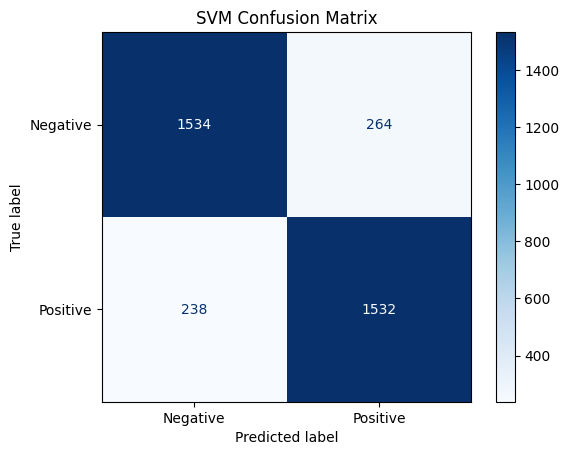

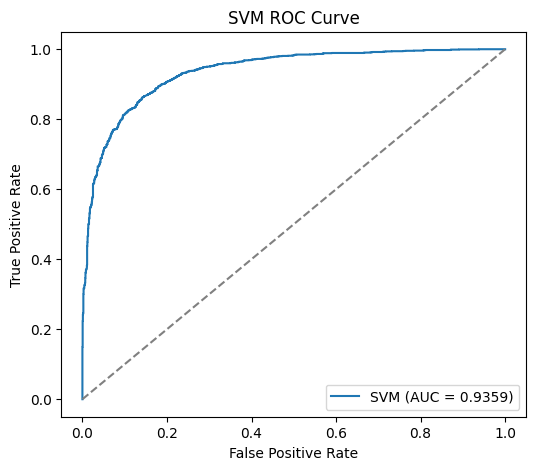


==================== Random Forest ====================
Training Accuracy: 0.7663
Testing Accuracy: 0.7511
Precision: 0.7290
Recall: 0.7932
F1-measure: 0.7597
AUC Value: 0.8451


<Figure size 600x500 with 0 Axes>

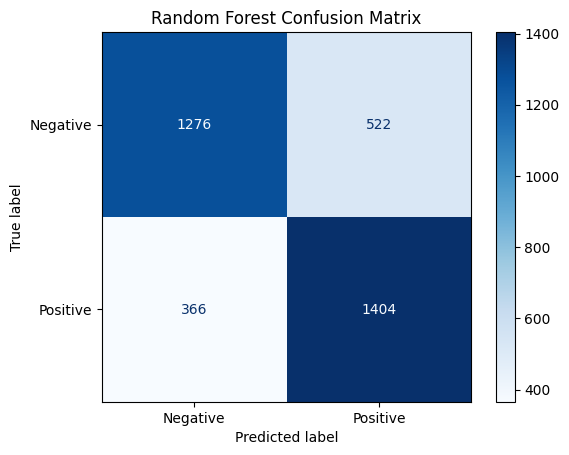

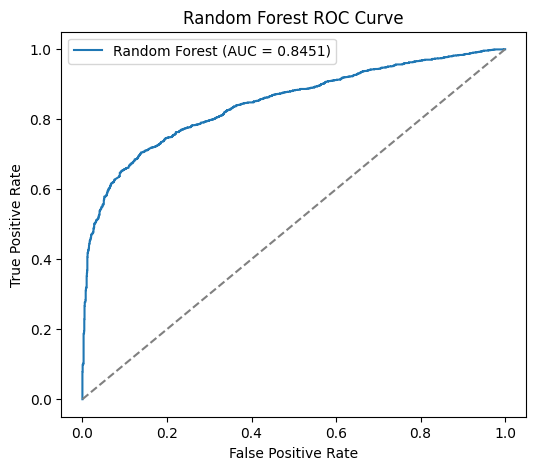


==================== Naive Bayes ====================
Training Accuracy: 0.8691
Testing Accuracy: 0.8442
Precision: 0.8546
Recall: 0.8266
F1-measure: 0.8403
AUC Value: 0.9265


<Figure size 600x500 with 0 Axes>

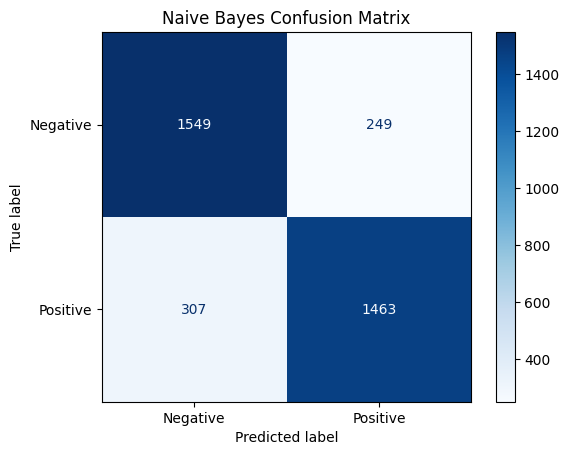

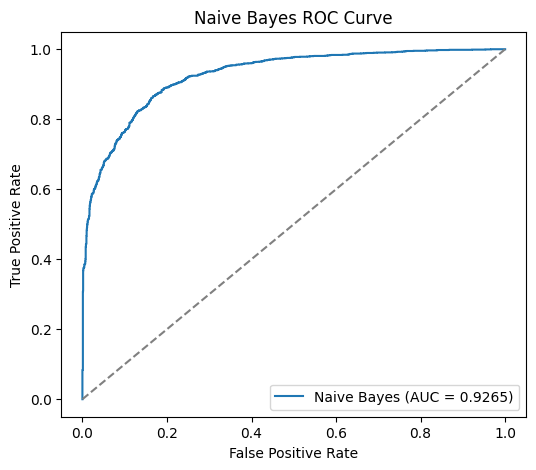


==================== Logistic Regression ====================
Training Accuracy: 0.9035
Testing Accuracy: 0.8702
Precision: 0.8609
Recall: 0.8808
F1-measure: 0.8707
AUC Value: 0.9454


<Figure size 600x500 with 0 Axes>

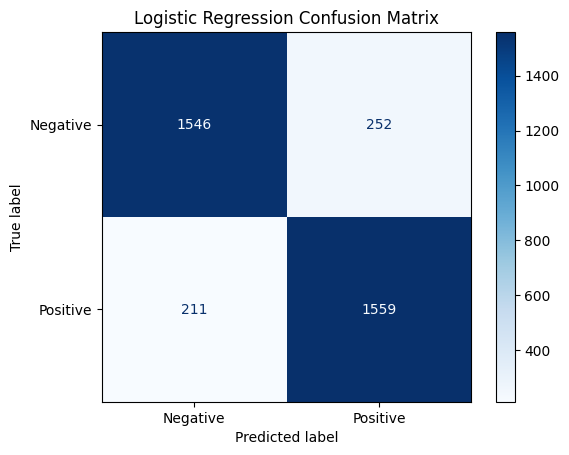

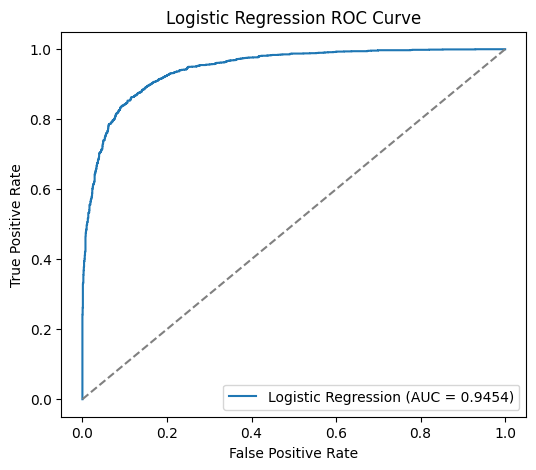


==================== XGBoost ====================
Training Accuracy: 0.8271
Testing Accuracy: 0.7993
Precision: 0.7821
Recall: 0.8254
F1-measure: 0.8032
AUC Value: 0.8895


<Figure size 600x500 with 0 Axes>

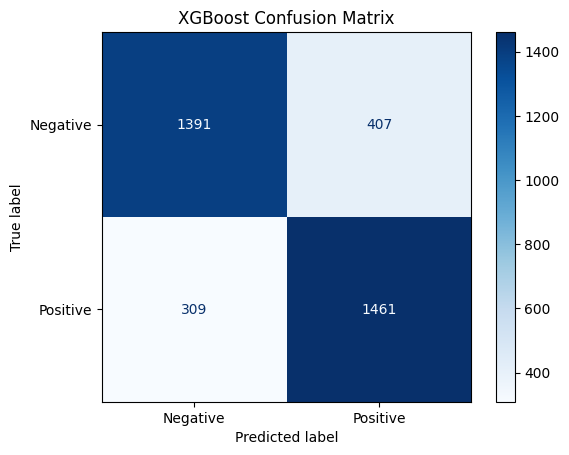

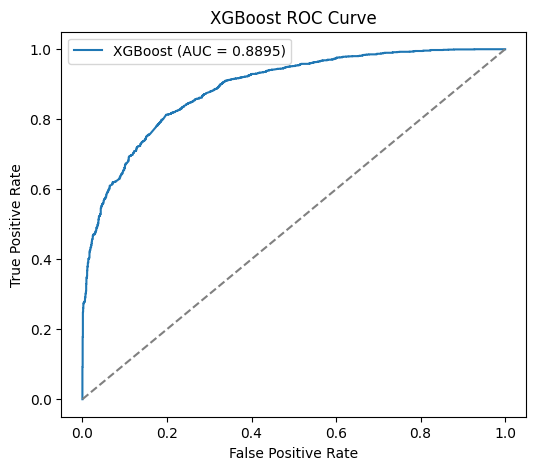

In [13]:
models = {
    "SVM": SVC(kernel='linear', C=0.1, probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=4, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name)


Training Deep Learning model...
Epoch 1/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7727 - loss: 0.4753 - val_accuracy: 0.8799 - val_loss: 0.2869
Epoch 2/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9294 - loss: 0.1800 - val_accuracy: 0.8767 - val_loss: 0.3113
Epoch 3/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9735 - loss: 0.0720 - val_accuracy: 0.8687 - val_loss: 0.4142
Epoch 4/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9950 - loss: 0.0192 - val_accuracy: 0.8655 - val_loss: 0.6169

==================== Deep Learning with TF-IDF ====================
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Training Accuracy: 0.9278
Testing Accuracy: 0.8744
Precision: 0.8799
Recall: 0.8650
F1-measure: 0.8724


<Figure size 600x500 with 0 Axes>

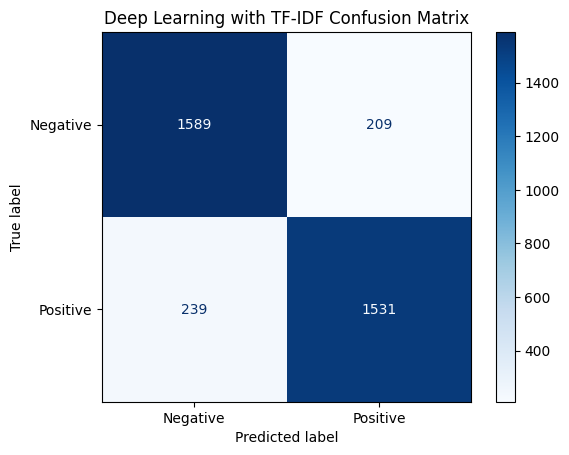

In [ ]:
# Deep Learning Model
print("\nTraining Deep Learning model...")
X_train_dense, X_test_dense = X_train.toarray(), X_test.toarray()  # Convert if sparse

# Define simple neural network
model_dl = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile and train
model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_dl.fit(X_train_dense, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate deep learning model
evaluate_model(model_dl, "Deep Learning with TF-IDF", X_train_dense, X_test_dense, y_train, y_test, is_keras=True)